# Importando librerias y extrayendo el dataset de la carpeta zip


In [1]:
import pandas as pd
import zipfile as zp

# zipfile = zp.ZipFile('dataset.zip', 'r')
# zipfile.extractall()
raw_dataset_1 = pd.read_csv('mozilla_bug_report_data.csv')

# Dataset extraido
raw_dataset_1

,bug_id,creation_date,component_name,product_name,short_description,long_description,assignee_name,reporter_name,resolution_category,resolution_code,status_category,status_code,update_date,quantity_of_votes,quantity_of_comments,resolution_date,bug_fix_time,severity_category,severity_code
0,BUGZILLA-294734,2005-05-18,Bugzilla-General,BUGZILLA,Emergency 2.16.10 Release,2.16.9 is broken -- many users can't enter bug...,mkanat,mkanat,fixed,1,resolved,4,2005-05-19,0,15,2005-05-19,1,blocker,6
1,OTHER_APPLICATIONS-363323,2006-12-09,DOM Inspector,OTHER_APPLICATIONS,DOM View is really inefficient with setting wh...,From comment in url:\r\n\r\nCurrent code:\r\nm...,sdwilsh,sdwilsh,fixed,1,resolved,4,2011-06-01,0,8,2007-01-14,36,normal,2
2,SUPPORT.MOZILLA.ORG-398246,2007-10-02,General,SUPPORT.MOZILLA.ORG,Add support for custom cookies and cache headers,Adding support for custom headers and cookie n...,morgamic,morgamic,fixed,1,resolved,4,2009-11-02,0,23,2008-03-24,174,blocker,6
3,RELEASE_ENGINEERING-525991,2009-11-02,General,RELEASE_ENGINEERING,Create Major Update from 3.0.15 to 3.5.5,NaN,catlee,catlee,fixed,1,resolved,4,2013-08-12,0,7,2009-11-10,8,normal,2
4,OTHER_APPLICATIONS-318859,2005-12-02,ChatZilla,OTHER_APPLICATIONS,DCC functionality in ChatZilla isn't functional.,User-Agent: Mozilla/5.0 (Macintosh U PPC...,gijskruitbosch+bugs,dafydd,fixed,1,resolved,4,2006-02-10,0,14,2005-12-07,5,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,WWW.MOZILLA.ORG-485595,2009-03-27,General,WWW.MOZILLA.ORG,Firefox 2.0. - 2.0.0.20 update/what's new page...,User-Agent: Mozilla/5.0 (Windows U Windo...,nobody,domthedude001,fixed,1,resolved,4,2012-08-23,0,15,2010-12-27,640,trivial,1
9995,CORE-132278,2002-03-20,XPCOM,CORE,|nsCOMPtr::operator&()| has outlived its usefu...,We originally made |operator&| illegal to ease...,scc,scc,fixed,1,resolved,4,2003-01-16,0,10,2002-03-28,8,normal,2
9996,FIREFOX_BUILD_SYSTEM-389793,2007-07-26,General,FIREFOX_BUILD_SYSTEM,Firefox build failed on OpenSolaris without --...,gmake[6]: Entering directory `/export/home/mrb...,ginnchen+exoracle,ginnchen+exoracle,fixed,1,resolved,4,2018-03-02,0,15,2007-08-05,10,normal,2
9997,MOZILLA_LOCALIZATIONS-402568,2007-11-05,fy-NL / Frisian,MOZILLA_LOCALIZATIONS,language pack fails to install due to broken i...,The files \r\n l10n/fy-NL/browser/defines.inc...,fryskefirefox,nthomas,fixed,1,resolved,4,2009-11-27,0,3,2009-11-27,753,normal,2


In [2]:
# Como quiero deshacerme de varias columnas las guardo en una variable y llamo esa variable en el drop
columns = ['assignee_name','update_date','quantity_of_votes','quantity_of_comments','creation_date','reporter_name','resolution_date','resolution_code','status_code','bug_fix_time','product_name','resolution_category','short_description']

drop_columns = raw_dataset_1.drop(columns,axis=1)
drop_columns

,bug_id,component_name,long_description,status_category,severity_category,severity_code
0,BUGZILLA-294734,Bugzilla-General,2.16.9 is broken -- many users can't enter bug...,resolved,blocker,6
1,OTHER_APPLICATIONS-363323,DOM Inspector,From comment in url:\r\n\r\nCurrent code:\r\nm...,resolved,normal,2
2,SUPPORT.MOZILLA.ORG-398246,General,Adding support for custom headers and cookie n...,resolved,blocker,6
3,RELEASE_ENGINEERING-525991,General,NaN,resolved,normal,2
4,OTHER_APPLICATIONS-318859,ChatZilla,User-Agent: Mozilla/5.0 (Macintosh U PPC...,resolved,normal,2
...,...,...,...,...,...,...
9994,WWW.MOZILLA.ORG-485595,General,User-Agent: Mozilla/5.0 (Windows U Windo...,resolved,trivial,1
9995,CORE-132278,XPCOM,We originally made |operator&| illegal to ease...,resolved,normal,2
9996,FIREFOX_BUILD_SYSTEM-389793,General,gmake[6]: Entering directory `/export/home/mrb...,resolved,normal,2
9997,MOZILLA_LOCALIZATIONS-402568,fy-NL / Frisian,The files \r\n l10n/fy-NL/browser/defines.inc...,resolved,normal,2


In [3]:
# Traigo de clockify la informacion de time_spend
time_spend = pd.read_csv('time_spend.csv')
time_spend_drop_columns = time_spend.drop(['Proyecto', 'Cliente','Tarea','Usuario','Grupo','Correo electrónico','Etiquetas','Facturable','Hora de inicio','Hora de finalización','Duración (decimal)','Tarifa facturable (USD)','Cantidad facturable (USD)','Descripción','Fecha de inicio','Fecha de finalización'], axis=1)
time_spend_drop_columns


,Duración (h)
0,02:22:12
1,01:14:29
2,01:27:36
3,00:00:05
4,00:58:18
5,00:00:02


In [4]:
# Ahora voy a intentar añadir la informacion de los demas archivos
columns = ['assignee_name','update_date','quantity_of_votes','quantity_of_comments','creation_date','reporter_name','resolution_date','resolution_code','status_code','bug_fix_time','product_name','resolution_category','short_description']
# eclipse
eclipse_dataset = pd.read_csv('eclipse_bug_report_data.csv')
eclipse_dataset_drop_columns = eclipse_dataset.drop( columns, axis=1)
# freedesktop
freedesktop_dataset = pd.read_csv('freedesktop_bug_report_data.csv')
freedesktop_dataset_drop_columns = freedesktop_dataset.drop(columns,axis=1)
# gcc
gcc_dataset = pd.read_csv('gcc_bug_report_data.csv')
gcc_dataset_drop_columns = gcc_dataset.drop(columns,axis=1)
# gnome
gnome_dataset = pd.read_csv('gnome_bug_report_data.csv')
gnome_dataset_drop_columns = gnome_dataset.drop(columns,axis=1)
# winehp
winehq_dataset = pd.read_csv('winehq_bug_report_data.csv')
winehq_dataset_drop_columns = winehq_dataset.drop(columns,axis=1)

new_dataset = pd.concat([drop_columns, eclipse_dataset_drop_columns, freedesktop_dataset_drop_columns, gcc_dataset_drop_columns, gnome_dataset_drop_columns, winehq_dataset_drop_columns], ignore_index = True)
new_dataset

,bug_id,component_name,long_description,status_category,severity_category,severity_code
0,BUGZILLA-294734,Bugzilla-General,2.16.9 is broken -- many users can't enter bug...,resolved,blocker,6
1,OTHER_APPLICATIONS-363323,DOM Inspector,From comment in url:\r\n\r\nCurrent code:\r\nm...,resolved,normal,2
2,SUPPORT.MOZILLA.ORG-398246,General,Adding support for custom headers and cookie n...,resolved,blocker,6
3,RELEASE_ENGINEERING-525991,General,NaN,resolved,normal,2
4,OTHER_APPLICATIONS-318859,ChatZilla,User-Agent: Mozilla/5.0 (Macintosh U PPC...,resolved,normal,2
...,...,...,...,...,...,...
51341,WINE-19917,-unknown,Created attachment 23384\r\nGeneral wine conso...,closed,normal,2
51342,WINE-36757,scrrun,Hello folks\r\n\r\nas the summary says.\r\n\r\...,closed,normal,2
51343,WINE-13280,wininet,Created attachment 13129\r\nKlipfolio 4 logs\r...,closed,normal,2
51344,WINE-41596,directx-d3d,Created attachment 55938\r\nterminal output\r\...,closed,normal,2


In [5]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# hacer una condicional y para hacer un encoded de la columna status_category
dataset_prueba_2 = new_dataset['status_category'].apply(lambda x: 1 if x == 'resolved' else 0)

# cambiar el nombre a la columna generada por mi
dataset_change_column_name = dataset_prueba_2.rename('status_category_encoded')

# concatenar los dos dataset
df_concat = pd.concat([dataset_change_column_name, new_dataset], axis=1)

# eliminar la columna status_category original que no es necesaria
df_concat_drop = df_concat.drop(['status_category'], axis=1)

# Resultado de hot encoding con apply, lambda y condicionales
df_concat_drop

,status_category_encoded,bug_id,component_name,long_description,severity_category,severity_code
0,1,BUGZILLA-294734,Bugzilla-General,2.16.9 is broken -- many users can't enter bug...,blocker,6
1,1,OTHER_APPLICATIONS-363323,DOM Inspector,From comment in url:\r\n\r\nCurrent code:\r\nm...,normal,2
2,1,SUPPORT.MOZILLA.ORG-398246,General,Adding support for custom headers and cookie n...,blocker,6
3,1,RELEASE_ENGINEERING-525991,General,NaN,normal,2
4,1,OTHER_APPLICATIONS-318859,ChatZilla,User-Agent: Mozilla/5.0 (Macintosh U PPC...,normal,2
...,...,...,...,...,...,...
51341,0,WINE-19917,-unknown,Created attachment 23384\r\nGeneral wine conso...,normal,2
51342,0,WINE-36757,scrrun,Hello folks\r\n\r\nas the summary says.\r\n\r\...,normal,2
51343,0,WINE-13280,wininet,Created attachment 13129\r\nKlipfolio 4 logs\r...,normal,2
51344,0,WINE-41596,directx-d3d,Created attachment 55938\r\nterminal output\r\...,normal,2


In [6]:
import random

final_dataset = pd.concat([df_concat_drop, time_spend_drop_columns], axis=1)
dataframe = final_dataset.fillna(f'0{random.randint(0, 5)}:{random.randint(0, 60)}:{random.randint(0, 60)}')

# Added a random time to the null values because I didn't have them in the clockify data
# dataframe result
dataframe

,status_category_encoded,bug_id,component_name,long_description,severity_category,severity_code,Duración (h)
0,1,BUGZILLA-294734,Bugzilla-General,2.16.9 is broken -- many users can't enter bug...,blocker,6,02:22:12
1,1,OTHER_APPLICATIONS-363323,DOM Inspector,From comment in url:\r\n\r\nCurrent code:\r\nm...,normal,2,01:14:29
2,1,SUPPORT.MOZILLA.ORG-398246,General,Adding support for custom headers and cookie n...,blocker,6,01:27:36
3,1,RELEASE_ENGINEERING-525991,General,03:33:42,normal,2,00:00:05
4,1,OTHER_APPLICATIONS-318859,ChatZilla,User-Agent: Mozilla/5.0 (Macintosh U PPC...,normal,2,00:58:18
...,...,...,...,...,...,...,...
51341,0,WINE-19917,-unknown,Created attachment 23384\r\nGeneral wine conso...,normal,2,03:33:42
51342,0,WINE-36757,scrrun,Hello folks\r\n\r\nas the summary says.\r\n\r\...,normal,2,03:33:42
51343,0,WINE-13280,wininet,Created attachment 13129\r\nKlipfolio 4 logs\r...,normal,2,03:33:42
51344,0,WINE-41596,directx-d3d,Created attachment 55938\r\nterminal output\r\...,normal,2,03:33:42


In [7]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le = le.fit(dataframe['severity_category'])
le.classes_

# Trabajando en el dataset creo que lo mejor sería pasar 	Duración (h) a minutos y pasarlo a int para poder trabajar con el
dataframe_hot_encoding = dataframe['severity_category'].apply(lambda x: 0 if x == 'blocker' else 1 if x == 'critical' else 2 if x == 'major' else 3 if x == 'minor' else 4 if x == 'normal' else 7)
dataframe_hot_encoding_rename = dataframe_hot_encoding.rename('severity_category_encoded')
dataframe_hot_encoding_concat = pd.concat([dataframe_hot_encoding_rename, dataframe], axis=1)
dataframe_hot_encoding_concat_drop = dataframe_hot_encoding_concat.drop(['severity_category'], axis=1)
dataframe_hot_encoding_concat_drop

dataframe_drop_column = dataframe_hot_encoding_concat_drop.drop(['bug_id'], axis=1)
dataframe_drop_column

,severity_category_encoded,status_category_encoded,component_name,long_description,severity_code,Duración (h)
0,0,1,Bugzilla-General,2.16.9 is broken -- many users can't enter bug...,6,02:22:12
1,4,1,DOM Inspector,From comment in url:\r\n\r\nCurrent code:\r\nm...,2,01:14:29
2,0,1,General,Adding support for custom headers and cookie n...,6,01:27:36
3,4,1,General,03:33:42,2,00:00:05
4,4,1,ChatZilla,User-Agent: Mozilla/5.0 (Macintosh U PPC...,2,00:58:18
...,...,...,...,...,...,...
51341,4,0,-unknown,Created attachment 23384\r\nGeneral wine conso...,2,03:33:42
51342,4,0,scrrun,Hello folks\r\n\r\nas the summary says.\r\n\r\...,2,03:33:42
51343,4,0,wininet,Created attachment 13129\r\nKlipfolio 4 logs\r...,2,03:33:42
51344,4,0,directx-d3d,Created attachment 55938\r\nterminal output\r\...,2,03:33:42


In [23]:
dataframe_drop_column_parseInt_duration = (dataframe_drop_column['Duración (h)'].apply(lambda x: int((int(x.split(':')[0]) * 60) + (int(x.split(':')[1]) * 60) + (int(x.split(':')[2])))))

# el tiempo 

# Resultado de pasar las horas y segundos a minutos
# dataframe_drop_column_parseInt_duration

# Haciendo un rename para poder hacer un drop a la columna original
dataframe_rename_column = dataframe_drop_column_parseInt_duration.rename('time_spend')

# Esto significa que en mi front tengo que recoger datos tipo float y no int como pensaba
# Concateno los datos nuevos al dataset anterior
dataframe_add_column = pd.concat([dataframe_rename_column, dataframe_drop_column], axis=1)

# Y ahora hago un drop de la columna original para quedarme nada más con los datos en minutos
dataframe_add_column_drop = dataframe_add_column.drop(['Duración (h)'], axis=1)

pd.set_option('display.max_rows', 20)

dataframe_add_column_drop

,time_spend,severity_category_encoded,status_category_encoded,component_name,long_description,severity_code
0,1452,0,1,Bugzilla-General,2.16.9 is broken -- many users can't enter bug...,6
1,929,4,1,DOM Inspector,From comment in url:\r\n\r\nCurrent code:\r\nm...,2
2,1716,0,1,General,Adding support for custom headers and cookie n...,6
3,5,4,1,General,03:33:42,2
4,3498,4,1,ChatZilla,User-Agent: Mozilla/5.0 (Macintosh U PPC...,2
...,...,...,...,...,...,...
51341,2202,4,0,-unknown,Created attachment 23384\r\nGeneral wine conso...,2
51342,2202,4,0,scrrun,Hello folks\r\n\r\nas the summary says.\r\n\r\...,2
51343,2202,4,0,wininet,Created attachment 13129\r\nKlipfolio 4 logs\r...,2
51344,2202,4,0,directx-d3d,Created attachment 55938\r\nterminal output\r\...,2


In [24]:
dataframe_change_data_clasification = dataframe_add_column_drop['component_name'].apply(lambda x: 'front' if x == 'front' else 'back' if x == 'back' else 'General' if x == 'General' else 'Chinese' if x == 'Chinese' else 'DOM' if x == 'DOM Inspector' else 'ZH' if x == 'zh' else 'direct' if x == 'directx' else 'API' if x == 'API' else 'other')
dataframe_change_data_clasification_encoding = dataframe_change_data_clasification.apply(lambda x:0 if x == 'Other' else 1 if x == 'Unknown' else 2 if x == 'General' else 3 if x == 'Chinese' else 4 if x == 'DOM' else 5 if x == 'ZH' else 6 if x == 'direct' else 7 if x == 'API' else 8 if x == 'not_registered' else 9)

dataframe_change_data_clasification_encoding_rename = dataframe_change_data_clasification_encoding.rename('component_name_encoded')
dataframe_change_data_clasification_encoding_rename_concat = pd.concat([dataframe_change_data_clasification_encoding_rename, dataframe_add_column_drop], axis=1)
dataframe_clasification_drop = dataframe_change_data_clasification_encoding_rename_concat.drop(['component_name','long_description'], axis=1)
dataframe_clasification_drop


,component_name_encoded,time_spend,severity_category_encoded,status_category_encoded,severity_code
0,9,1452,0,1,6
1,4,929,4,1,2
2,2,1716,0,1,6
3,2,5,4,1,2
4,9,3498,4,1,2
...,...,...,...,...,...
51341,9,2202,4,0,2
51342,9,2202,4,0,2
51343,9,2202,4,0,2
51344,9,2202,4,0,2


(31347, 4) (31347,)
0.001023657251805865


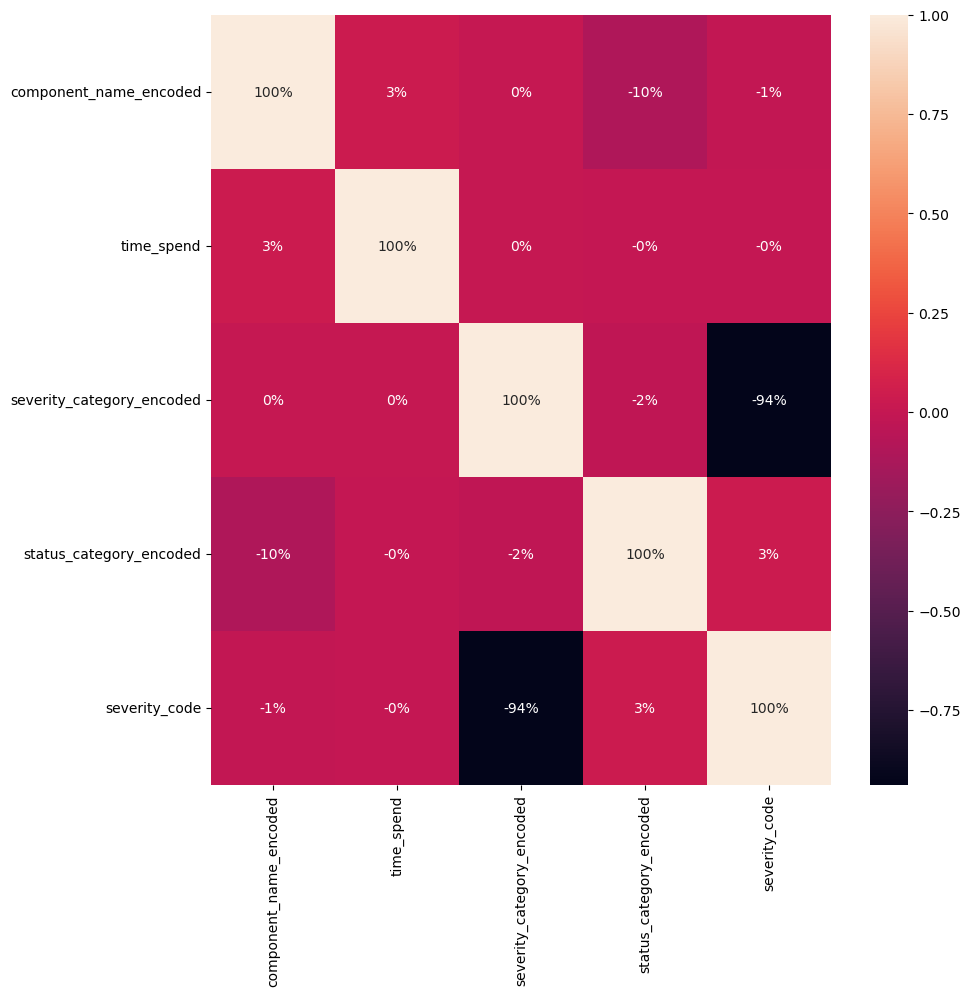

In [32]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

example_dataframe = dataframe_clasification_drop.drop(['severity_code'], axis=1)

X = dataframe_clasification_drop.drop(['time_spend'], axis=1)
y = dataframe_clasification_drop['time_spend']

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=19999, random_state=10000)

print(X_train.shape, y_train.shape)

reg = LinearRegression().fit(X, y)
print (reg.score(X, y))

# hacer heatmap para ver la correlación entre las variables

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(dataframe_clasification_drop.corr(), annot=True, fmt='.0%')
plt.show()



<AxesSubplot:>

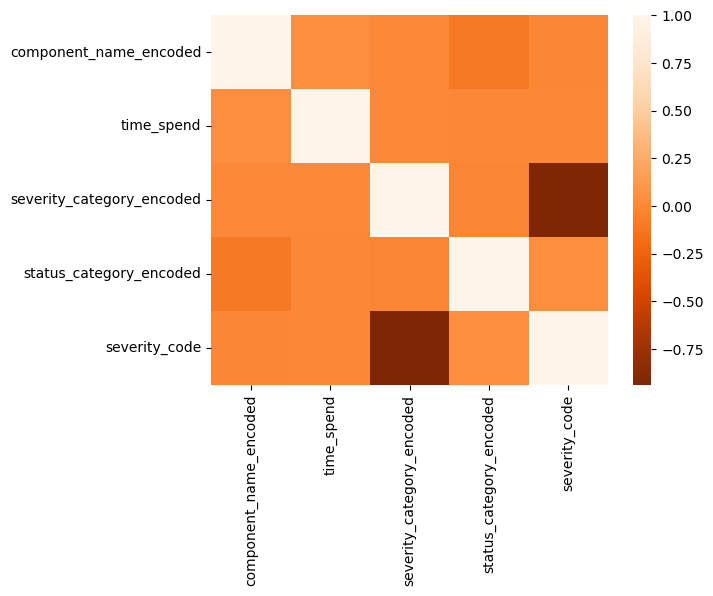

In [33]:
sns.heatmap(dataframe_clasification_drop.corr(),cmap = "Oranges_r")

In [34]:
dataframe_clasification_drop.corr()

,component_name_encoded,time_spend,severity_category_encoded,status_category_encoded,severity_code
component_name_encoded,1.000000,0.031826,0.003992,-0.098920,-0.008577
time_spend,0.031826,1.000000,0.003104,-0.003395,-0.003543
severity_category_encoded,0.003992,0.003104,1.000000,-0.023248,-0.937789
status_category_encoded,-0.098920,-0.003395,-0.023248,1.000000,0.031844
severity_code,-0.008577,-0.003543,-0.937789,0.031844,1.000000


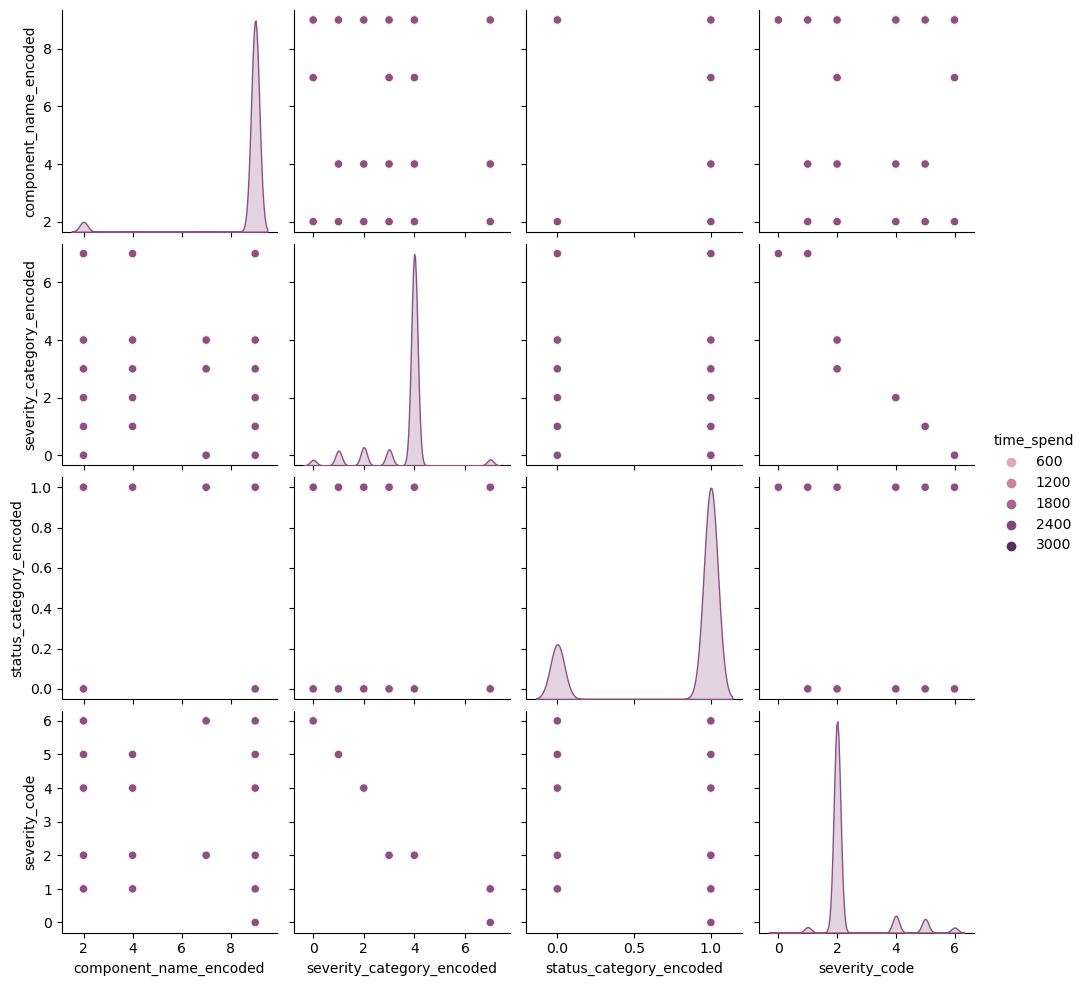

In [36]:
sns.set_palette('husl')
sns.pairplot(dataframe_clasification_drop, hue = "time_spend")

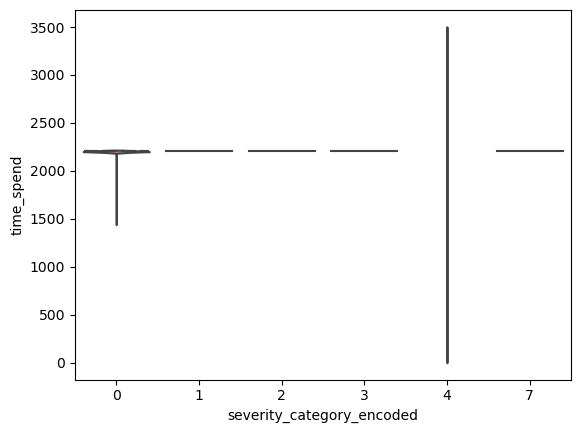

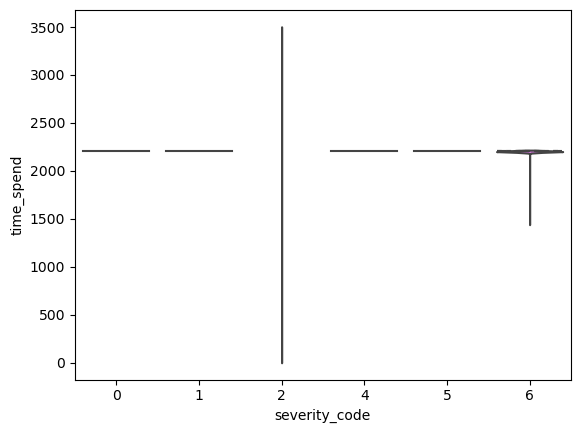

In [37]:
g= sns.violinplot(data=dataframe_clasification_drop,x='severity_category_encoded',y='time_spend',inner='quartile')

plt.show()

g= sns.violinplot(data=dataframe_clasification_drop,x='severity_code',y='time_spend',inner='quartile')

plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

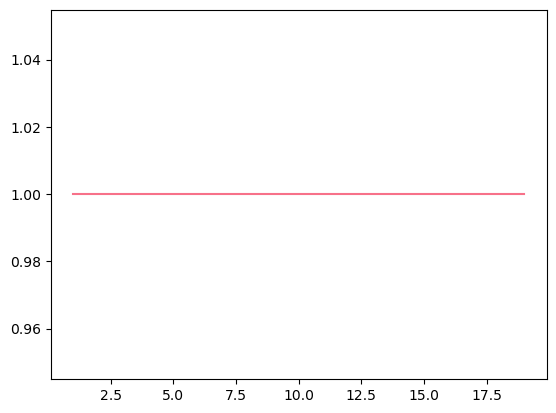

In [38]:
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

scores = [] 

for k in range(1, 20):
    knc = KNeighborsClassifier()
    knc.fit(X,y)
    y_pred = knc.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
plt.plot(range(1,20), scores)
# plt.Xlabel("K vecinos seleccionados")
# plt.ylabel("precisión del modelo")
# plt.title("precision con respecto a cada numero del vector")
plt.show



In [39]:
scores

[0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905,
 0.9998831457172905]

In [65]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_

array([ 0.35905296, -0.01098761, -0.00578747, -0.06551889])

In [66]:
reg.intercept_


2198.971427844709

In [67]:
reg.predict(X_test)

array([2202.02212875, 2202.02212875, 2202.02212875, ..., 2202.02212875,
       2202.03890384, 2201.85853491])